In [1]:
#Please execute this cell
import jupman;

# Exam -  Wed 13, Feb 2019

**Scientific Programming - Data Science @ University of Trento**


## [Download exercises and solution](../../../_static/generated/sciprog-ds-2019-02-13-exam.zip)

## Introduction

* **Taking part to this exam erases any vote you had before**

### What to do

1) Download  `sciprog-ds-2019-02-13-exam.zip` and extract it <b>on your desktop</b>. Folder content should be like this:

```
sciprog-ds-2019-02-13-FIRSTNAME-LASTNAME-ID
    exam-2019-02-13.ipynb
    company.py
    company_test.py
    tree.py
    tree_test.py
    jupman.py
    sciprog.py                                    
```

2) Rename `sciprog-ds-2019-02-13-FIRSTNAME-LASTNAME-ID` folder: put your name, lastname an id number, like `sciprog-ds-2019-02-13-john-doe-432432`

From now on, you will be editing the files in that folder. At the end of the exam, that is what will be evaluated.

3) Edit the files following the instructions in this worksheet for each exercise. Every exercise should take max 25 mins. If it takes longer, leave it and try another exercise.

4) When done:

- if you have unitn login:  zip and send to [examina.icts.unitn.it/studente](http://examina.icts.unitn.it/studente)
  
- If you don't have unitn login: tell instructors and we will download your work manually
 


## Part A - Bus network visualization

Open Jupyter and start editing this notebook `exam-2019-02-13.ipynb`



Today we will visualize intercity bus network in GTFS format taken from [dati.trentino.it](https://dati.trentino.it/dataset/trasporti-pubblici-del-trentino-formato-gtfs), MITT service. Original data was split in several files which we merged into dataset [data/network-short.csv](data/network-short.csv).

To visualize it, we will use [networkx](https://networkx.github.io/) library. Let's first see an example on how to do it:

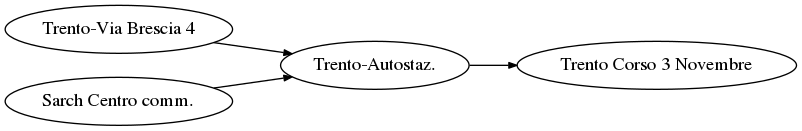

In [2]:
import networkx as nx
from sciprog import draw_nx


Gex = nx.DiGraph()

# we can force horizontal layout like this:

Gex.graph['graph']= {
                    'rankdir':'LR',  
                  }

# When we add nodes, we can identify them with an identifier like the
# stop_id which is separate from the label, because in some unfortunate
# case two different stops can share the same label. 

Gex.add_node('1', label='Trento-Autostaz.', 
                  color='black', fontcolor='black')
Gex.add_node('723', label='Trento-Via Brescia 4', 
                    color='black', fontcolor='black')
Gex.add_node('870', label='Sarch Centro comm.', 
                    color='black', fontcolor='black')
Gex.add_node('1180', label='Trento Corso 3 Novembre', 
                     color='black', fontcolor='black')

# IMPORTANT: edges connect stop_ids ,  NOT labels !!!!
Gex.add_edge('870','1')
Gex.add_edge('723','1')
Gex.add_edge('1','1180')

# function defined in sciprog.py :
draw_nx(Gex)
    

### Colors and additional attributes

Since we have a bus stop netowrk, we might want to draw edges according to the route they represent. Here we show how to do it only with the edge from _Trento-Autostaz_ to _Trento Corso 3 Novembre_: 

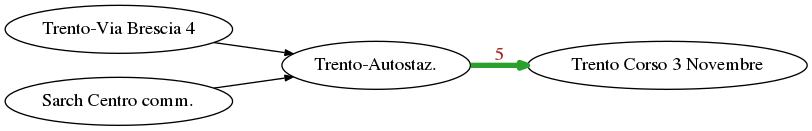

In [3]:
# we can retrieve an edge like this:

edge = Gex['1']['1180']

# and set attributes, like these:

edge['weight'] = 5                # it takes 5 minutes to go from Trento-Autostaz
                                  # to Trento Corso 3 Novembre
edge['label'] = str(5)            # the label is a string

edge['color'] = '#2ca02c'         # we can set some style for the edge, such as color 
edge['penwidth']= 4               # and thickness

edge['route_short_name'] = 'B301' # we can add any attribute we want, 
                                  # Note these custom ones won't show in the graph


draw_nx(Gex)

To be more explicit, we can also add a legend this way:

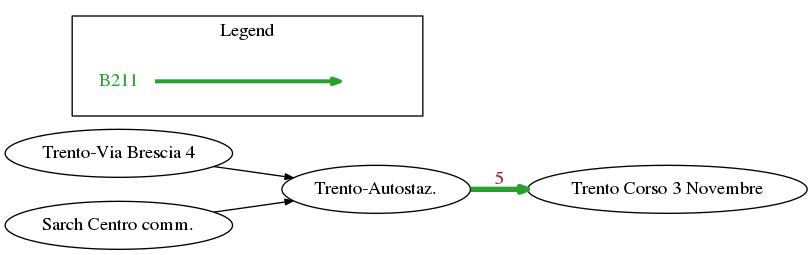

In [4]:
draw_nx(Gex, [{'color': '#2ca02c', 'label': 'B211'}])

In [5]:
# Note an edge is a simple dictionary:
print(edge)

{'color': '#2ca02c', 'penwidth': 4, 'weight': 5, 'label': '5', 'route_short_name': 'B301'}


### load_stops

To load [network-short.csv](data/network-short.csv), we provide this function:

In [6]:
def load_stops():
    """Loads file data and RETURN a list of dictionaries with the stop times
    """
    
    import csv
    with open('data/network-short.csv', newline='', encoding='UTF-8') as csvfile:
        reader = csv.DictReader(csvfile)
        lst = []
        for d in reader:
            lst.append(d)
    return lst


In [7]:
stops = load_stops()

#IMPORTANT: NOTICE *ALL* VALUES ARE *STRINGS*  !!!!!!!!!!!!

stops[0:2]

[{'': '3',
  'agency_id': '12',
  'arrival_time': '06:27:00',
  'departure_time': '06:27:00',
  'direction_id': '0',
  'route_id': '76',
  'route_long_name': 'Trento-Sardagna-Candriai-Vaneze-Vason-Viote',
  'route_short_name': 'B202',
  'route_type': '3',
  'service_id': '22018091220190621',
  'stop_code': '2620VE',
  'stop_desc': '',
  'stop_id': '5025',
  'stop_lat': '46.073125',
  'stop_lon': '11.093579',
  'stop_name': 'Sardagna Civ.20',
  'stop_sequence': '4',
  'trip_headsign': 'Trento-Autostaz.',
  'trip_id': '0002402742018091220190621',
  'zone_id': '2620.0'},
 {'': '4',
  'agency_id': '12',
  'arrival_time': '06:28:00',
  'departure_time': '06:28:00',
  'direction_id': '0',
  'route_id': '76',
  'route_long_name': 'Trento-Sardagna-Candriai-Vaneze-Vason-Viote',
  'route_short_name': 'B202',
  'route_type': '3',
  'service_id': '22018091220190621',
  'stop_code': '2620MS',
  'stop_desc': '',
  'stop_id': '843',
  'stop_lat': '46.069871',
  'stop_lon': '11.097749',
  'stop_name':

### A1 extract_routes

Implement `extract_routes` function:

In [8]:

import networkx as nx
from sciprog import draw_nx

stops = load_stops()

def extract_routes(stops):
    """ Extract all route_short_name from the stops list and RETURN 
        an alphabetically sorted list of them, without duplicates 
        (see example)
        
    """
    
   
    s = set()
    for diz in stops:
        s.add(diz['route_short_name'])
    ret = list(s)
    ret.sort()
    return ret
    

In [8]:

import networkx as nx
from sciprog import draw_nx

stops = load_stops()

def extract_routes(stops):
    """ Extract all route_short_name from the stops list and RETURN 
        an alphabetically sorted list of them, without duplicates 
        (see example)
        
    """
    raise Exception('TODO IMPLEMENT ME !')

Example: 

In [9]:
extract_routes(stops)

['B201', 'B202', 'B211', 'B217', 'B301']

### A2 to_int_min

Implement this function:

In [10]:

def to_int_min(time_string):
    """ 
        Takes a time string in the format like 08:27:42
        and RETURN the time since midnight in minutes, ignoring 
        the seconds (es 507)
    """
    
    hours = int(time_string[0:2])
    mins = int(time_string[3:5])
    return (hours * 60 + mins)
    

In [10]:

def to_int_min(time_string):
    """ 
        Takes a time string in the format like 08:27:42
        and RETURN the time since midnight in minutes, ignoring 
        the seconds (es 507)
    """
    raise Exception('TODO IMPLEMENT ME !')

Example: 

In [11]:
to_int_min('08:27:42')

507

### A3 get_legend_edges

If you have `n` routes numbered from `0` to `n-1`, and you want to assign to each of them a different color, we provide this function: 

In [12]:
def get_color(i, n):
    """ RETURN the i-th color chosen from n possible colors, in 
        hex format (i.e. #ff0018).
    
        - if i < 0 or i >= n, raise ValueError
    """
    if n < 1:
        raise ValueError("Invalid n: %s" % n)
    if i < 0 or i >= n:
        raise ValueError("Invalid i: %s" % i)
    
    #HACKY, just for matplotlib < 3
    lst = ['#1f77b4',
         '#ff7f0e',
         '#2ca02c',
         '#d62728',
         '#9467bd',
         '#8c564b',
         '#e377c2',
         '#7f7f7f',
         '#bcbd22',
         '#17becf']
    
    return lst[i % 10]


In [13]:
get_color(4,5)

'#9467bd'


Now implement this function:

In [14]:
def get_legend_edges():
    """
        RETURN a list of dictionaries, where each dictionary represent a route 
        with label and associated color. Dictionaries are in the order returned by
        extract_routes() function.
    """
    
    legend_edges = []
    i = 0
    routes = extract_routes(stops)
    
    for route_short_name in routes:
        legend_edges.append({
            'label': route_short_name,
            'color':get_color(i,len(routes))
        })
        i += 1
    return legend_edges
    



In [14]:
def get_legend_edges():
    """
        RETURN a list of dictionaries, where each dictionary represent a route 
        with label and associated color. Dictionaries are in the order returned by
        extract_routes() function.
    """
    raise Exception('TODO IMPLEMENT ME !')



In [15]:
get_legend_edges()

[{'color': '#1f77b4', 'label': 'B201'},
 {'color': '#ff7f0e', 'label': 'B202'},
 {'color': '#2ca02c', 'label': 'B211'},
 {'color': '#d62728', 'label': 'B217'},
 {'color': '#9467bd', 'label': 'B301'}]

### A4 calc_nx

Implement this function: 

In [16]:

def calc_nx(stops):
    """ 
        RETURN a NetworkX DiGraph representing the bus stop network
    
        - To keep things simple, we suppose routes NEVER overlap (no edge is ever
          shared by two routes), so we need only a DiGraph and not a MultiGraph
        - as label for nodes, use the stop_name, and try to format it nicely.
        - as 'weight' for the edges, use the time in minutes between one stop 
          and the next one
        - as custom property, add 'route_short_name'
        - as 'color' for the edges, use the color given by provided 
          get_color(i,n) function
        - as 'penwidth' for edges, set 4
        
        - IMPORTANT: notice stops are already ordered by arrival_time, this 
                     makes it easy to find edges !
        - HINT: to make sure you're on the right track, try first to 
                represent one single route, like B202

    """
    
    
    G = nx.DiGraph()

    G.graph['graph']= {
                        'rankdir':'LR',  # horizontal layout , 
                        
                      }
    
    G.name = '*************  calc_nx  SOLUTION '
    
    routes = extract_routes(stops)
    
    
    i = 0
    
    for route_short_name in routes:
        
        prev_diz = None

        for diz in stops:

            if diz['route_short_name'] == route_short_name:

                G.add_node( diz['stop_id'], 
                            label=diz['stop_name'].replace(' ', '\n').replace('-','\n'),
                            color='black',
                            fontcolor='black')

                if prev_diz:            

                    G.add_edge(prev_diz['stop_id'], diz['stop_id'])
                    delta_time = to_int_min(diz['arrival_time']) - to_int_min(prev_diz['arrival_time'])

                    edge = G[prev_diz['stop_id']][diz['stop_id']]                
                    edge['weight'] = delta_time
                    edge['label'] = str(delta_time)
                    
                    edge['route_short_name'] = route_short_name
                    
                    edge['color'] =  get_color(i, len(routes))
                    edge['penwidth']= 4
                    

                prev_diz = diz
        i += 1
    return G
    
    

In [16]:

def calc_nx(stops):
    """ 
        RETURN a NetworkX DiGraph representing the bus stop network
    
        - To keep things simple, we suppose routes NEVER overlap (no edge is ever
          shared by two routes), so we need only a DiGraph and not a MultiGraph
        - as label for nodes, use the stop_name, and try to format it nicely.
        - as 'weight' for the edges, use the time in minutes between one stop 
          and the next one
        - as custom property, add 'route_short_name'
        - as 'color' for the edges, use the color given by provided 
          get_color(i,n) function
        - as 'penwidth' for edges, set 4
        
        - IMPORTANT: notice stops are already ordered by arrival_time, this 
                     makes it easy to find edges !
        - HINT: to make sure you're on the right track, try first to 
                represent one single route, like B202

    """
    raise Exception('TODO IMPLEMENT ME !')
    

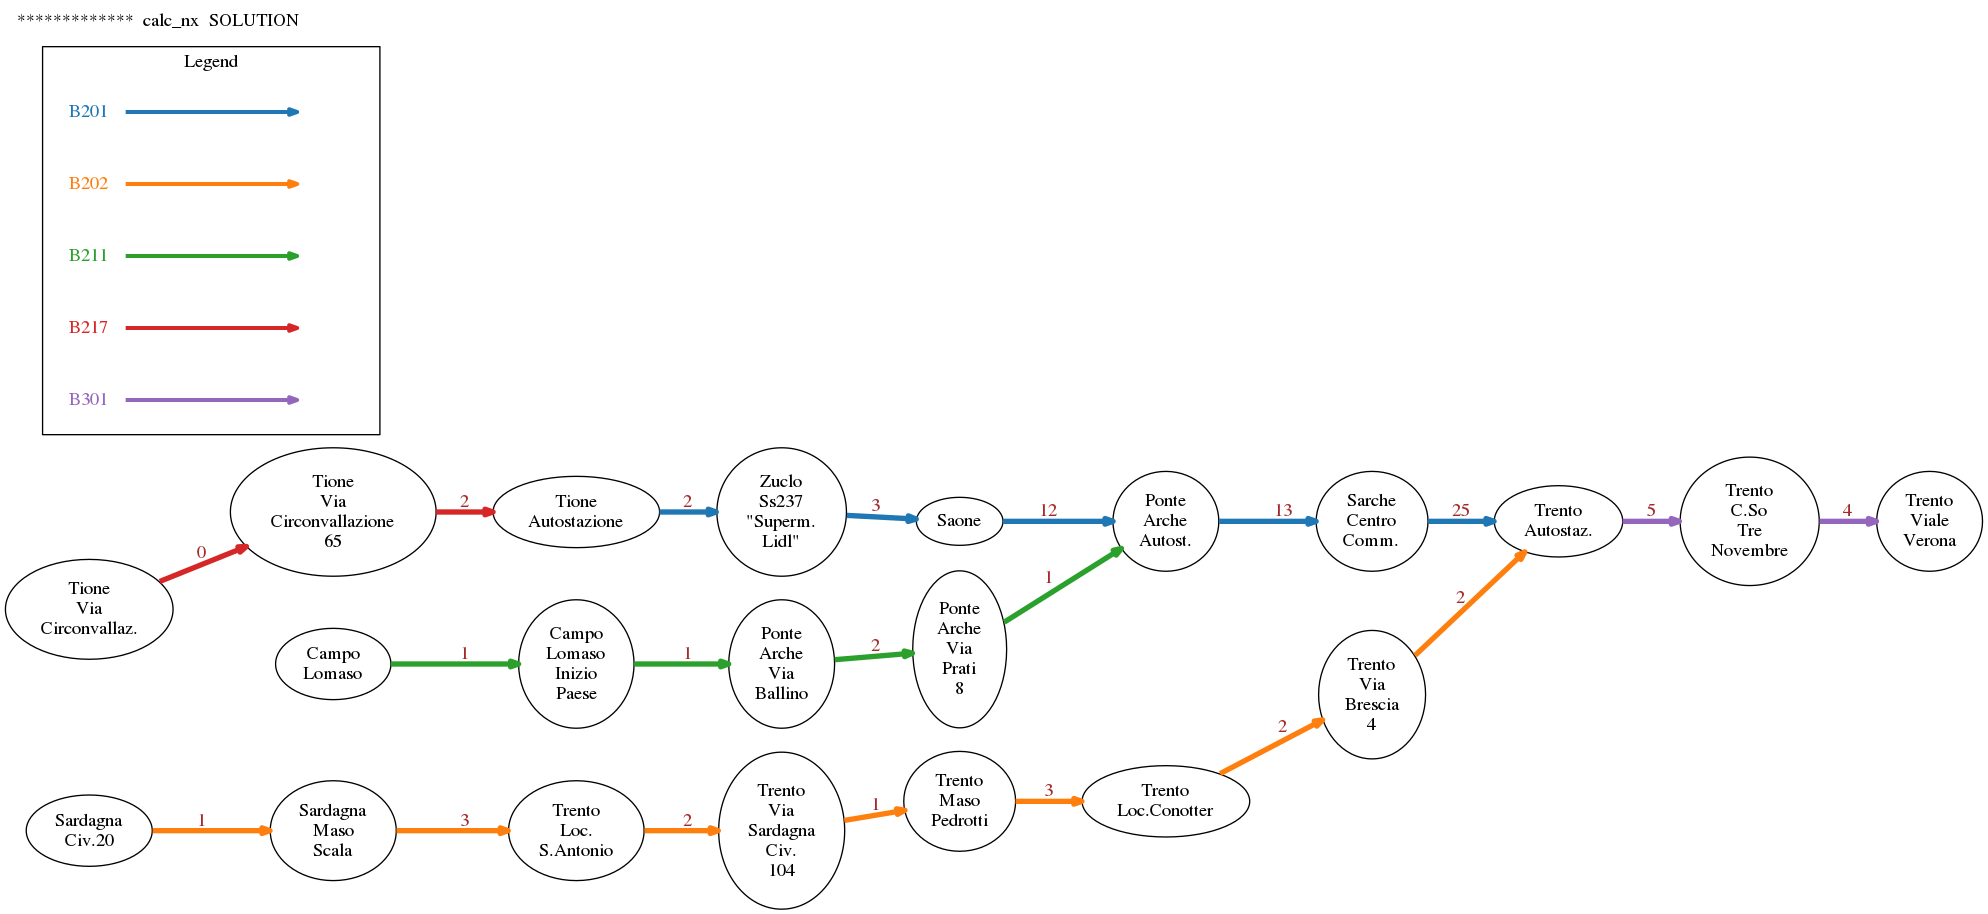

In [17]:
G = calc_nx(stops)

draw_nx(G, get_legend_edges())

### A5 color_hubs

A _hub_ is a node that allows to switch route, that is, it is touched by _at least_ two different routes. 

For example, _Trento-Autostaz_ is touched by three routes, which is more than one, so it is a hub. Let's examine the node - we know it has `stop_id='1'`:

In [18]:
G.node['1']

{'color': 'black', 'fontcolor': 'black', 'label': 'Trento\nAutostaz.'}

If we examine its `in_edges`, we find it has incoming edges from `stop_id` `'723'` and `'870'`, which represent respectively _Trento Via Brescia_ and _Sarche Centro Commerciale_ :

In [19]:
G.in_edges('1')

InEdgeDataView([('723', '1'), ('870', '1')])

If you get a View object, if needed you can easily transform to a list:

In [20]:
list(G.in_edges('1'))

[('723', '1'), ('870', '1')]

In [21]:
G.node['723']

{'color': 'black', 'fontcolor': 'black', 'label': 'Trento\nVia\nBrescia\n4'}

In [22]:
G.node['870']

{'color': 'black', 'fontcolor': 'black', 'label': 'Sarche\nCentro\nComm.'}

There is only an outgoing edge toward _Trento Corso 3 Novembre_ :

In [23]:
G.out_edges('1')

OutEdgeDataView([('1', '1108')])

In [24]:
G.node['1108']

{'color': 'black',
 'fontcolor': 'black',
 'label': 'Trento\nC.So\nTre\nNovembre'}

If, for example, we want to know the `route_id` of this outgoing edge, we can access it this way:

In [25]:
G['1']['1108']

{'color': '#9467bd',
 'label': '5',
 'penwidth': 4,
 'route_short_name': 'B301',
 'weight': 5}

If you want to change the color attribute of the node `'1'`, you can write like this:

In [26]:
G.node['1']['color'] = 'red'
G.node['1']['fontcolor'] = 'red'

Now implement the function `color_hubs`:

In [27]:
def color_hubs(G):
    """ Print the hubs in the graph G as text, and then draws the graph 
        with the hubs colored in red.
        
        NOTE: you don't need to recalculate the graph, just set the relevant 
              nodes color to red
    
    """
    
    
    G.name = '*************  color_hubs  SOLUTION '
    
    hubs = []
    for node in G.nodes():
        edges = list(G.in_edges(node)) + list(G.out_edges(node))
        route_short_names = set()
        for edge in edges:
            route_short_names.add(G[edge[0]][edge[1]]['route_short_name'])
        if len(route_short_names) > 1:            
            hubs.append(node)
    
    print("SOLUTION: The hubs are:")
    print()
    
        
    for hub in hubs:
        print("stop_id:%s\n%s\n" % (hub, G.node[hub]['label'] ))    
        G.node[hub]['color']='red'
        G.node[hub]['fontcolor']='red'
    
    draw_nx(G, legend_edges=get_legend_edges())
    


In [27]:
def color_hubs(G):
    """ Print the hubs in the graph G as text, and then draws the graph 
        with the hubs colored in red.
        
        NOTE: you don't need to recalculate the graph, just set the relevant 
              nodes color to red
    
    """
    raise Exception('TODO IMPLEMENT ME !')
    draw_nx(G, legend_edges=get_legend_edges())
    


SOLUTION: The hubs are:

stop_id:757
Tione
Autostazione

stop_id:742
Ponte
Arche
Autost.

stop_id:1
Trento
Autostaz.



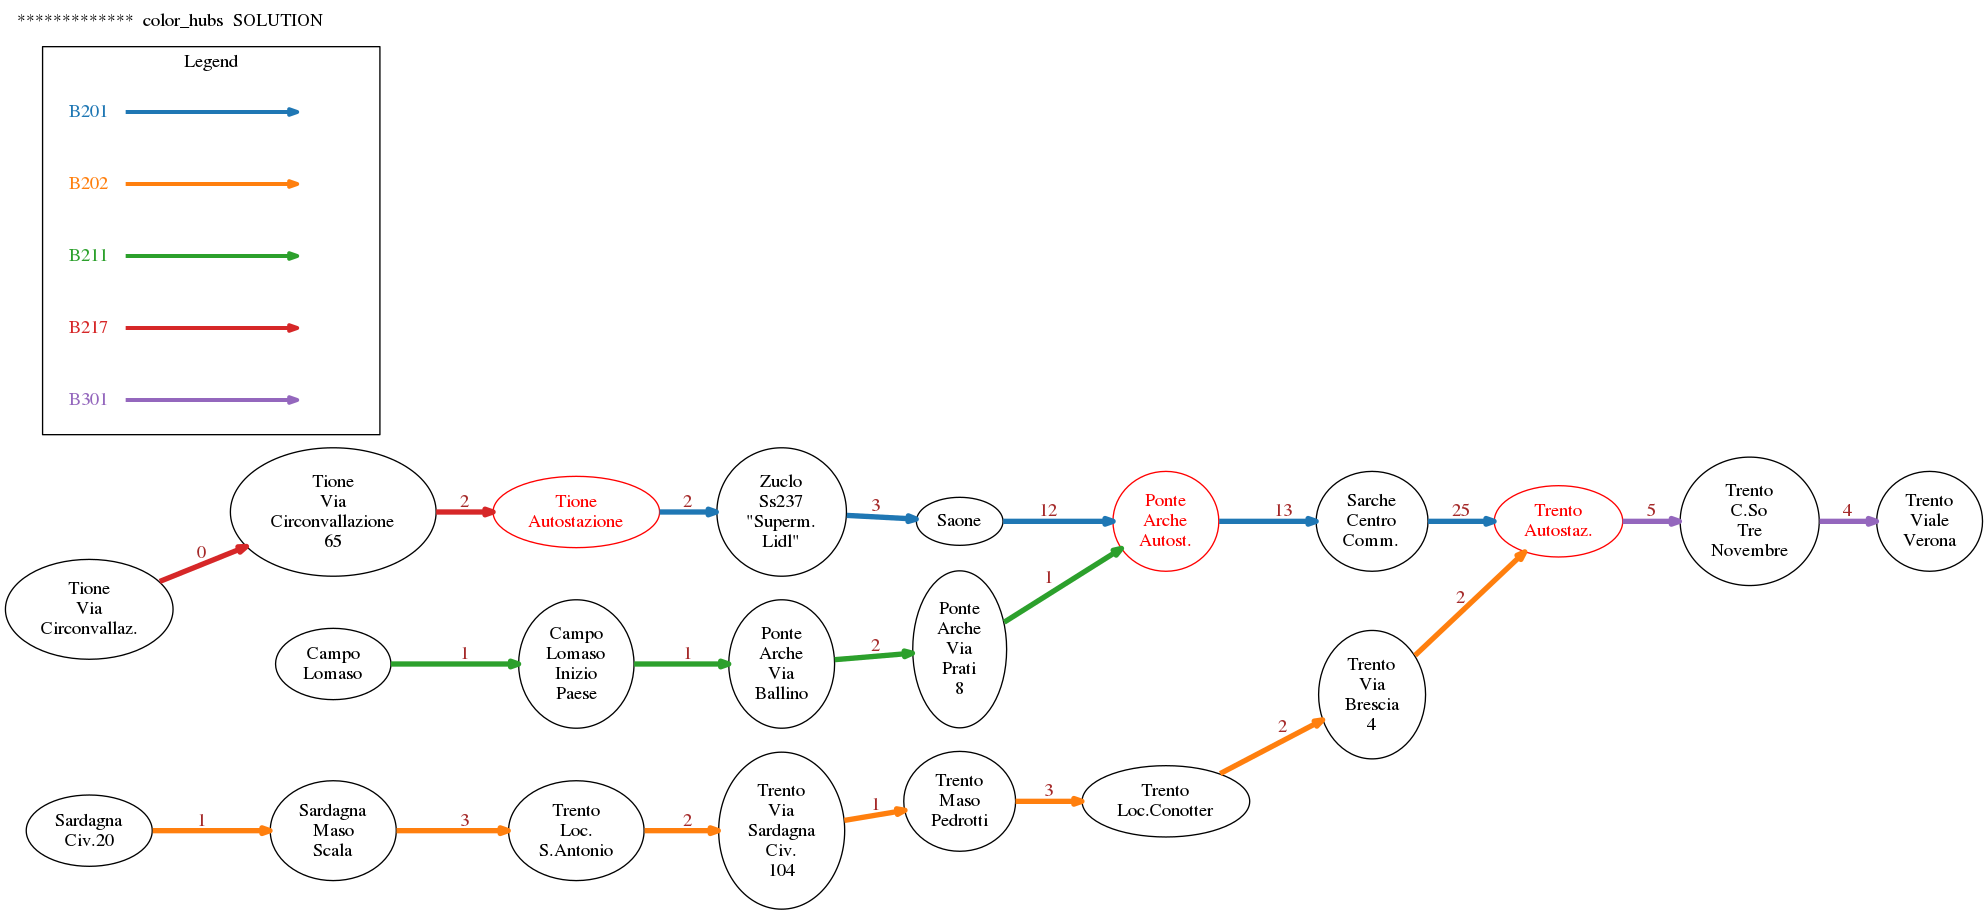

In [28]:
color_hubs(G)

### A6 plot_timings

To extract bus times from `G`, use this: 

In [29]:
G.edges()

OutEdgeView([('842', '3974'), ('757', '746'), ('829', '3213'), ('1556', '4392'), ('3974', '841'), ('4391', '4390'), ('857', '742'), ('4392', '4391'), ('5025', '843'), ('841', '881'), ('723', '1'), ('742', '870'), ('870', '1'), ('3213', '757'), ('1', '1108'), ('843', '842'), ('746', '857'), ('1108', '1109'), ('881', '723'), ('4390', '742')])

If you get a View, you can iterate through the sequence like it were a list

To get the data from an edge, you can use this:

In [30]:
G.get_edge_data('1','1108')

{'color': '#9467bd',
 'label': '5',
 'penwidth': 4,
 'route_short_name': 'B301',
 'weight': 5}

Now implement the function `plot_timings`:

In [31]:
def plot_timings(G):
    """
        Given a networkx DiGraph G plots a frequency histogram of the
        time between bus stops.
    
    """
    
    
    import numpy as np
    import matplotlib.pyplot as plt

    
    timings = [G.get_edge_data(edge[0], edge[1])['weight'] for edge in G.edges()]    

    import matplotlib.pyplot as plt
    import numpy as np

    # add histogram

    min_x = min(timings)      
    max_x = max(timings)      
    bar_width = 1.0
    
    # in this case hist returns a tuple of three values
    # we put in three variables
    n, bins, columns = plt.hist(timings,
                                bins=range(min_x,max_x + 1), 
                                width=1.0)        #  graphical width of the bars

    xs = np.arange(min_x,max_x + 1)
    plt.xlabel('Time between stops in minutes')
    plt.ylabel('Frequency counts')
    plt.title('Time histogram SOLUTION')
    plt.xlim(0, max(timings) + 2)
    plt.xticks(xs + bar_width / 2,  # position of ticks
               xs )   
    plt.show()
    


In [31]:
def plot_timings(G):
    """
        Given a networkx DiGraph G plots a frequency histogram of the
        time between bus stops.
    
    """
    raise Exception('TODO IMPLEMENT ME !')


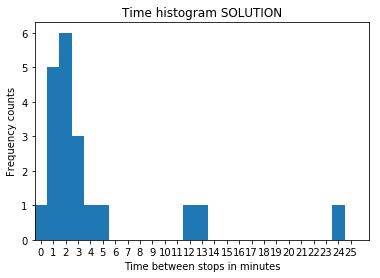

In [32]:
plot_timings(G)

## Part B

## B.1 Theory

Let `L` a list of size `n`, and `i` and `j` two indeces. Return the computational complexity of function `fun()` with respect to `n`.

**Write the solution in separate `theory.txt` file**

```python
def fun(L, i, j):
    # j-i+1 is the number of elements
    # between index i and index j (both included)
    if j-i+1 <= 3:
        # Compute their minimum
        return min(L[i:j+1])
    else:
       onethird = (j-i+1)//3
       res1 = fun(L,i, i+onethird)
       res2 = fun(L,i+onethird+1, i+2*onethird)
       res3 = fun(L,i+2*onethird+1, j)
       return min(res1,res2,res3)
```

**ANSWER**: $\Theta(n)$

## B2 Company queues

We can model a company as a list of many employees ordered by their rank, the highest ranking being the first in the list. We assume all employees have different rank. Each employee has a name, a rank, and a queue of tasks to perform (as a Python deque).

When a new employee arrives, it is inserted in the list in the right position according to his rank:

In [33]:
from company_sol import *

c = Company()
print(c)


Company:
  name  rank  tasks 



In [34]:
c.add_employee('x',9)

In [35]:
print(c)


Company:
  name  rank  tasks 
  x     9     deque([])



In [36]:
c.add_employee('z',2)


In [37]:
print(c)


Company:
  name  rank  tasks 
  x     9     deque([])
  z     2     deque([])



In [38]:
c.add_employee('y',6)

In [39]:
print(c)


Company:
  name  rank  tasks 
  x     9     deque([])
  y     6     deque([])
  z     2     deque([])



### B2.1 add_employee

Implement this method:

```python
def add_employee(self, name, rank):
    """
        Adds employee with name and rank to the company, maintaining 
        the _employees list sorted by rank (higher rank comes first)

        Represent the employee as a dictionary with keys 'name', 'rank' 
        and 'tasks' (a Python deque)

        - here we don't mind about complexity, feel free to use a 
          linear scan and .insert 
        - If an employee of the same rank already exists, raise ValueError
        - if an employee of the same name already exists, raise ValueError
    """   
```

**Testing**: `python3 -m unittest company_test.AddEmployeeTest`

### B2.2 add_task

Each employee has a queue of tasks to perform. Tasks enter from the right and leave from the left. Each task has associated a required rank to perform it, but when it is assigned to an employee the required rank may exceed the employee rank or be far below the employee rank. Still, when the company receives the task, it is scheduled in the given employee queue, ignoring the task rank. 


In [40]:
c.add_task('a',3,'x')

In [41]:
c


Company:
  name  rank  tasks 
  x     9     deque([('a', 3)])
  y     6     deque([])
  z     2     deque([])

In [42]:
c.add_task('b',5,'x')


In [43]:
c


Company:
  name  rank  tasks 
  x     9     deque([('a', 3), ('b', 5)])
  y     6     deque([])
  z     2     deque([])

In [44]:
c.add_task('c',12,'x')
c.add_task('d',1,'x')
c.add_task('e',8,'y')
c.add_task('f',2,'y')
c.add_task('g',8,'y')
c.add_task('h',10,'z')


In [45]:
c


Company:
  name  rank  tasks 
  x     9     deque([('a', 3), ('b', 5), ('c', 12), ('d', 1)])
  y     6     deque([('e', 8), ('f', 2), ('g', 8)])
  z     2     deque([('h', 10)])

Implement this function: 
    
```python
def add_task(self, task_name, task_rank, employee_name):
    """ Append the task as a (name, rank) tuple to the tasks of 
        given employee

        - If employee does not exist, raise ValueError
    """
```
**Testing**: `python3 -m unittest company_test.AddTaskTest`


### B2.2 work

Work in the company is produced in work steps. Each work step produces a list of all task names executed by the company in that work step. 

A work step is done this way:

For each employee, starting from the highest ranking one, dequeue its current task (from the left), and than compare the task required rank with the employee rank according to these rules:

- When an employee discovers a task requires a rank strictly greater than his rank, he will append the task to his supervisor tasks. Note the highest ranking employee may be forced to do tasks that are greater than his rank. 
- When an employee discovers he should do a task requiring a rank strictly less than his, he will try to see if the next lower ranking employee can do the task, and if so append the task to that employee tasks. 
- When an employee cannot pass the task to the supervisor nor the next lower ranking employee, he will actually execute the task, adding it to the work step list


**Example**:

In [46]:
c


Company:
  name  rank  tasks 
  x     9     deque([('a', 3), ('b', 5), ('c', 12), ('d', 1)])
  y     6     deque([('e', 8), ('f', 2), ('g', 8)])
  z     2     deque([('h', 10)])

In [47]:
c.work()

DEBUG: Employee x gives task ('a', 3) to employee y
DEBUG: Employee y gives task ('e', 8) to employee x
DEBUG: Employee z gives task ('h', 10) to employee y
DEBUG: Total performed work this step: []


[]

In [48]:
c


Company:
  name  rank  tasks 
  x     9     deque([('b', 5), ('c', 12), ('d', 1), ('e', 8)])
  y     6     deque([('f', 2), ('g', 8), ('a', 3), ('h', 10)])
  z     2     deque([])

In [49]:
c.work()

DEBUG: Employee x gives task ('b', 5) to employee y
DEBUG: Employee y gives task ('f', 2) to employee z
DEBUG: Employee z executes task ('f', 2)
DEBUG: Total performed work this step: ['f']


['f']

In [50]:
c


Company:
  name  rank  tasks 
  x     9     deque([('c', 12), ('d', 1), ('e', 8)])
  y     6     deque([('g', 8), ('a', 3), ('h', 10), ('b', 5)])
  z     2     deque([])

In [51]:
c.work()

DEBUG: Employee x executes task ('c', 12)
DEBUG: Employee y gives task ('g', 8) to employee x
DEBUG: Total performed work this step: ['c']


['c']

In [52]:
c


Company:
  name  rank  tasks 
  x     9     deque([('d', 1), ('e', 8), ('g', 8)])
  y     6     deque([('a', 3), ('h', 10), ('b', 5)])
  z     2     deque([])

In [53]:
c.work()

DEBUG: Employee x gives task ('d', 1) to employee y
DEBUG: Employee y executes task ('a', 3)
DEBUG: Total performed work this step: ['a']


['a']

In [54]:
c


Company:
  name  rank  tasks 
  x     9     deque([('e', 8), ('g', 8)])
  y     6     deque([('h', 10), ('b', 5), ('d', 1)])
  z     2     deque([])

In [55]:
c.work()

DEBUG: Employee x executes task ('e', 8)
DEBUG: Employee y gives task ('h', 10) to employee x
DEBUG: Total performed work this step: ['e']


['e']

In [56]:
c


Company:
  name  rank  tasks 
  x     9     deque([('g', 8), ('h', 10)])
  y     6     deque([('b', 5), ('d', 1)])
  z     2     deque([])

In [57]:
c.work()

DEBUG: Employee x executes task ('g', 8)
DEBUG: Employee y executes task ('b', 5)
DEBUG: Total performed work this step: ['g', 'b']


['g', 'b']

In [58]:
c


Company:
  name  rank  tasks 
  x     9     deque([('h', 10)])
  y     6     deque([('d', 1)])
  z     2     deque([])

In [59]:
c.work()

DEBUG: Employee x executes task ('h', 10)
DEBUG: Employee y gives task ('d', 1) to employee z
DEBUG: Employee z executes task ('d', 1)
DEBUG: Total performed work this step: ['h', 'd']


['h', 'd']

In [60]:
c


Company:
  name  rank  tasks 
  x     9     deque([])
  y     6     deque([])
  z     2     deque([])


Now implement this method:

```python
def work(self):
    """ Performs a work step and RETURN a list of performed task names.

        For each employee, dequeue its current task from the left and:
        - if the task rank is greater than the rank of the
          current employee, append the task to his supervisor queue 
          (the highest ranking employee must execute the task)
        - if the task rank is lower or equal to the rank of the
          next lower ranking employee, append the task to that employee
          queue
        - otherwise, add the task name to the list of
          performed tasks to return
    """

```

**Testing**: `python3 -m unittest company_test.WorkTest`

## B3 GenericTree

## B3.1 fill_left

Open `tree.py` and implement `fill_left` method: 

```python
    def fill_left(self, stuff):
        """ MODIFIES the tree by filling the leftmost branch data
            with values from provided array 'stuff'
            
            - if there aren't enough nodes to fill, raise ValueError
            - root data is not modified
            - *DO NOT* use recursion

        """
```

**Testing**: `python3 -m unittest tree_test.FillLeftTest`

**Example:**


In [61]:
from tree_test import gt
from tree_sol import *


In [62]:
t  = gt('a', 
            gt('b', 
                    gt('e',
                            gt('f'), 
                            gt('g', 
                                    gt('i')),
                    gt('h')),
            gt('c'),
            gt('d')))


In [63]:
print(t)

a
└b
 ├e
 │├f
 │├g
 ││└i
 │└h
 ├c
 └d


In [64]:
t.fill_left(['x','y'])

In [65]:
print(t)

a
└x
 ├y
 │├f
 │├g
 ││└i
 │└h
 ├c
 └d


In [66]:
t.fill_left(['W','V','T'])
print(t)

a
└W
 ├V
 │├T
 │├g
 ││└i
 │└h
 ├c
 └d


## B3.2 follow

Open `tree.py` and implement `follow` method: 

```python
def follow(self, positions):
        """
            RETURN an array of node data, representing a branch from the
            root down to a certain depth.
            The path to follow is determined by given positions, which
            is an array of integer indeces, see example.

            - if provided indeces lead to non-existing nodes, raise ValueError
            - IMPORTANT: *DO NOT* use recursion, use a couple of while instead.
            - IMPORTANT: *DO NOT* attempt to convert siblings to 
                         a python list !!!! Doing so will give you less points!

        """
```
**Testing**: `python3 -m unittest tree_test.FollowTest`

**Example:**
```


              level  01234      

                     a
                     ├b
                     ├c
                     |└e
                     | ├f
                     | ├g
                     | |└i
                     | └h
                     └d            

                    RETURNS
t.follow([])        [a]          root data is always present
t.follow([0])       [a,b]        b is the 0-th child of a
t.follow([2])       [a,d]        d is the 2-nd child of a 
t.follow([1,0,2])   [a,c,e,h]    c is the 1-st child of a 
                                 e is the 0-th child of c 
                                 h is the 2-nd child of e
t.follow([1,0,1,0]) [a,c,e,g,i]  c is the 1-st child of a
                                 e is the 0-th child of c 
                                 g is the 1-st child of e
                                 i is the 0-th child of g
```


In [67]:
#ignore this cell
import company_sol
company_sol.DEBUG = False
import company_test
jupman.run(company_test)
import tree_test
jupman.run(tree_test)

..............
----------------------------------------------------------------------
Ran 14 tests in 0.012s

OK
...................
----------------------------------------------------------------------
Ran 19 tests in 0.022s

OK
